In [ ]:
#IDEE DA SVILLUPPARE
#1.Crea nuova colonna dataset in cui ogni riga c'è il numero di lettere del nome dell'animale
#2.Trova altri dati da aggiungere/dataset più grande o simile
#3.Guarda medium, datafish e altri
#4.Trovare algoritmi più adatti a dataset binari

<div class="alert alert-info" style="background-color:DodgerBlue; color:white; padding:0px 5px; border-radius:15px; opacity: 0.8; border-color:DodgerBlue">
    <h2 style='margin:10px 5px; font-size:35px; text-align: center'> Progetto Finale - Programming with Python 
    </h2>
</div>

<div class="alert alert-info" style="background-color:orange; color:black; padding:0px 5px; border-radius:15px; border-color:orange">
    <h2 style='margin:10px 5px; font-size:14px; font-style:italic; text-align: center'> Studenti: Laura Proto & Giacomo de Gioia </h2>
</div>

## Traccia numero 6 - I mammiferi depongono uova?
### I dataset Zoo fornisce una serie di dati relativi a diverse specie animali al fine di classificarle in 7 diverse classi, ovvero mammiferi, uccelli, rettili, pesci, anfibi, insetti e invertebrati.
Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ogni specie animale, il progetto mira a confrontare le diverse specie e raggruparle utilizzando diversi algoritmi di clustering.
Confrontando poi il risultato di ogni algoritmo, si intende mostrare quale algoritmo di clustering approssimi meglio le classi fornite dal dataset.
Si richiede pertanto non solo di definire una metodologia per confrontare i risulati del clustering con la classificazione attesa, ma anche di descrivere in modo sintetico le caratteristiche distintive di ciascun cluster di specie prodotto dall'algoritmo oggetto della valutazione.

https://www.kaggle.com/uciml/zoo-animal-classification

https://scikit-learn.org/stable/modules/clustering.html



<div class="alert alert-info" style="background-color:LightGray; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 0. Installazioni e Import preliminari </h2>
</div>

In [ ]:
#Install all the libraries the project needs
pip install -r requirements.txt

In [1]:
#Import usefull
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify 
import sklearn
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import utils as ut

<div class="alert alert-info" style="background-color:grey; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 1. Analisi esplorativa dei dati </h2>
</div>

https://www.intelligenzaartificialeitalia.net/post/analisi-esplorativa-dati-con-python-analisi-esplorativa-dei-dati-eda-esempio-pratico

https://www.diariodiunanalista.it/posts/analisi-esplorativa-dei-dati-con-python-e-pandas/

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px;  border-style: dashed; border-color: black">
    <h2 style='margin:10px 5px; font-size:17px;'> 1a. Analisi del file class.csv </h2>
</div>

In [15]:
ut.analisys("class.csv")

+----------+
|Nome File:|
+----------+
class.csv 

+-----------------------+
|Informazioni DataFrame:|
+-----------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes

 - Numero di osservazioni (righe) x caratteristiche (colonne): (7, 4) 


+------------------------+
|Anteprima del DataFrame:|
+------------------------+
None    Class_Number  Number_Of_Animal_Species_In_Class Class_Type  \
0             1                                 41     Mammal   
1             2                                 

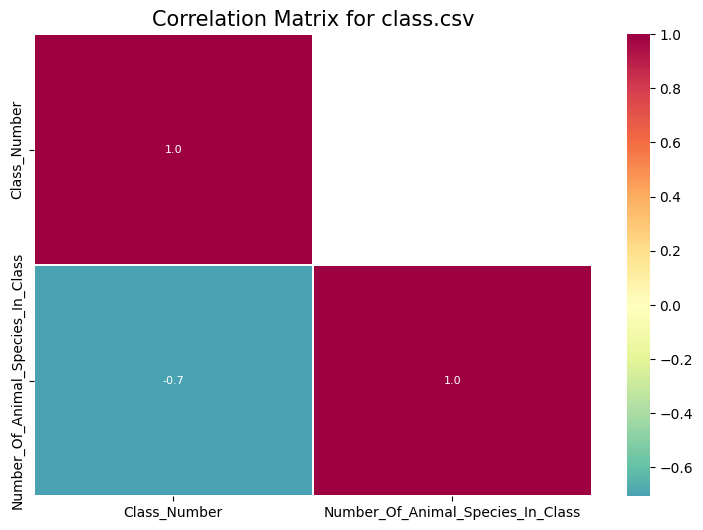

In [4]:
ut.confusion_matrix("class.csv")

In [18]:
#change name's column Number_Of_Animal_Species_In_Class from df_class before done Pie Graphic
df_class = pd.read_csv("class.csv")
df_class.rename(columns={"Number_Of_Animal_Species_In_Class": "Animal_for_Species"}, inplace=True)

In [25]:
#Pie Graphic
fig = px.pie(df_class, values='Animal_for_Species', names='Class_Type', title='Animal Class Types Distribution', hole=0.40)
fig.show()

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px;  border-style: dashed; border-color: black">
    <h2 style='margin:10px 5px; font-size:17px;'> 1b. Analisi del file zoo.csv </h2>
</div>

In [13]:
ut.analisys("zoo.csv")

+----------+
|Nome File:|
+----------+
zoo.csv 

+-----------------------+
|Informazioni DataFrame:|
+-----------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null

In [2]:
#delete coloum class_type from df_zoo before done Correlation Matrix
df_zoo = pd.read_csv("zoo.csv")
df = df_zoo.drop(['class_type'],axis=1)

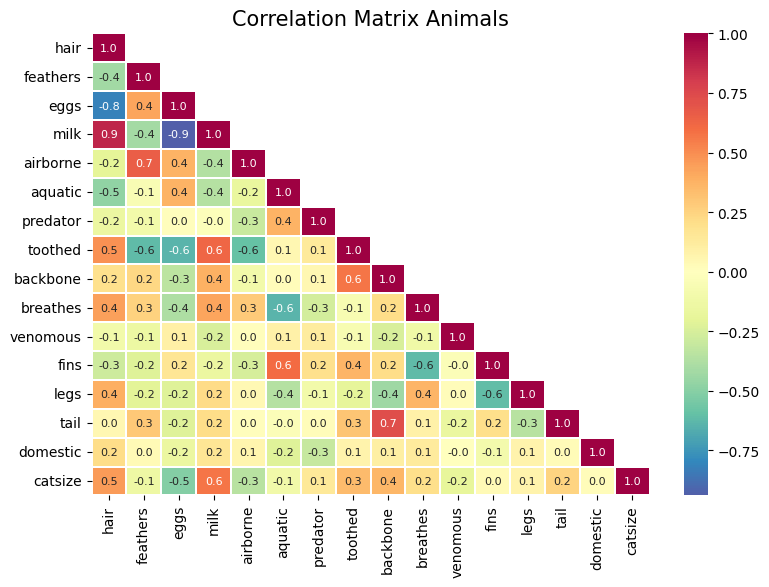

In [3]:
ut.confusion_matrix(df)

In [ ]:
#Questo grafico si legge guardando la gradazione di colore: 
#l'addove il colore è più scuro, la correlazione è più alta!
#Esempio: nella prima colonna, eggs, ha forte correlaizone con hair

# From here, work in progress ---->

In [ ]:
prova = df_zoo.drop(['animal_name'],axis=1)

In [ ]:
prova.head(2)

In [ ]:
fig = px.scatter_matrix(prova.drop("class_type",axis=1),
width=1200, height=1600)
fig.show()

# 2. Applico algoritmi di clustering 
##### (lezione del 14 febbraio 2:00:00)

## 2a. L'algoritmo KMeans ------------Esempio da capire

https://en.wikipedia.org/wiki/K-means_clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
vals = df_zoo.drop(['animal_name'],axis=1).values 
init = 10
inertia = []
for n in range(1 , 11):
    clust = KMeans(n_clusters = n, n_init =10)
    clust.fit(vals)
    inertia.append(clust.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title(f"Titolo", fontsize=15)
plt.show()

In [ ]:
zoo_cluster = KMeans(n_clusters = 3,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan')
zoo_cluster.fit(vals)
labs = zoo_cluster.labels_
centroids = zoo_cluster.cluster_centers_

In [ ]:
import plotly as py
import plotly.graph_objs as go

df_zoo['label'] =  labs
trace = go.Scatter3d(
    x= df_zoo['predator'],
    y= df_zoo['class_type'],
    z= df_zoo['legs'],
    mode='markers',
     marker=dict(
        color = df_zoo['label'], 
        size= 5,
        line=dict(
            color= df_zoo['label'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'predator'),
            yaxis = dict(title  = 'class'),
            zaxis = dict(title  = 'legs')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)

# Algoritmi da testare
https://machinelearningmastery.com/clustering-algorithms-with-python/

1. Agglomerative Clustering
2. BIRCH
3. DBSCAN
4. K-Means
5. Mini-Batch K-Means
6. Mean Shift
7. OPTICS
8. Spectral Clustering
10. Gaussian Mixture Model


In [28]:
#animal_name già eliminata
x, y = df_zoo.drop("class_type",axis=1),df_zoo[['class_type']]

In [36]:
# synthetic classification dataset
from numpy import where
from matplotlib import pyplot

# define dataset
x, y = df_zoo(n_samples=10, n_features=10, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
    
# show the plot
pyplot.show()

TypeError: 'DataFrame' object is not callable

In [32]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# define dataset
x, _ = df_zoo(n_samples=100, n_features=10, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = AffinityPropagation(damping=0.9)

# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

TypeError: 'DataFrame' object is not callable